# EDA

**Cryptocurrency Market Data Analytics**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 20)

# Nuestro JSON esta preparado de 1 JSON por linea, por esta razon se pone lines=True.
# Además se tiene que poner convert_dates=False para que no convierta 'dates' a datetime porque lo hace de forma incorrecta.
df = pd.read_json("datasets/raw_coins_data.json", lines=True, convert_dates=False)

# df = pd.read_json("datasets/raw_coins_data_RESP_20230810_1529.json", lines=True, convert_dates=False)

df.head()

,id,symbol,name,date,current_price,market_cap,total_volume,facebook_likes,twitter_followers,reddit_average_posts_48h,...,subscribers,total_issues,closed_issues,pull_requests_merged,pull_request_contributors,commit_count_4_weeks,alexa_rank,bing_matches,additions,deletions
0,bitcoin,btc,Bitcoin,01-01-2021,29022.418395,5.394380e+11,4.350352e+10,NaN,74537.0,6.250,...,3624.0,5885.0,5288.0,8185.0,706.0,298.0,NaN,NaN,1819.0,-1561.0
1,bitcoin,btc,Bitcoin,02-01-2021,29352.126792,5.455933e+11,3.408972e+10,NaN,74635.0,7.909,...,3624.0,5889.0,5291.0,8188.0,706.0,280.0,NaN,NaN,1862.0,-1625.0
2,bitcoin,btc,Bitcoin,03-01-2021,32163.824935,5.978877e+11,5.727344e+10,NaN,74741.0,7.500,...,3624.0,5889.0,5291.0,8188.0,706.0,277.0,NaN,NaN,1862.0,-1625.0
3,bitcoin,btc,Bitcoin,04-01-2021,33008.226203,6.136169e+11,1.788941e+11,NaN,74852.0,6.273,...,3625.0,5892.0,5294.0,8193.0,706.0,279.0,NaN,NaN,1230.0,-1291.0
4,bitcoin,btc,Bitcoin,05-01-2021,31515.575967,5.857263e+11,7.465717e+10,NaN,74907.0,6.333,...,3634.0,5893.0,5300.0,8199.0,706.0,272.0,NaN,NaN,1277.0,-1361.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9420 entries, 0 to 9419
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           9420 non-null   object 
 1   symbol                       9420 non-null   object 
 2   name                         9420 non-null   object 
 3   date                         9420 non-null   object 
 4   current_price                9420 non-null   float64
 5   market_cap                   9420 non-null   float64
 6   total_volume                 9420 non-null   float64
 7   facebook_likes               0 non-null      float64
 8   twitter_followers            7828 non-null   float64
 9   reddit_average_posts_48h     9420 non-null   float64
 10  reddit_average_comments_48h  9420 non-null   float64
 11  reddit_subscribers           6608 non-null   float64
 12  reddit_accounts_active_48h   6608 non-null   float64
 13  forks             

Por ahora consideramos que no son necesarias las columnas symbol y name.

In [22]:
df = df.drop(columns=['symbol', 'name'])

In [23]:
# Renombrar additions y deletions con el prefijo de code para recordar de que eran y current price en realidad es price.
df.rename({'additions': 'code_additions', 'deletions': 'code_deletions', 'current_price': 'price'}, axis=1, inplace=True)

### Date
Convertir 'date' a datetime leyendo el formato correcto.

In [24]:
df['date'].head()

0    01-01-2021
1    02-01-2021
2    03-01-2021
3    04-01-2021
4    05-01-2021
Name: date, dtype: object

In [25]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")

In [26]:
df['date'].head()

0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
Name: date, dtype: datetime64[ns]

In [27]:
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9420 entries, 0 to 9419
Series name: date
Non-Null Count  Dtype         
--------------  -----         
9420 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 73.7 KB


Por ultimo revisemos que no halla ningun NaN en 'date'.

In [28]:
df['date'].isna().sum()

0

### Chequear filas duplicadas

Debido a como levantamos los datos no debería haber ninguna pero igual es importante revisarlo. 

In [29]:
df.duplicated().sum()

0

## Monedas a estudiar

Trajimos los datos de las 10 monedas con mejor market cap.

In [30]:
df.columns

Index(['id', 'date', 'price', 'market_cap', 'total_volume', 'facebook_likes',
       'twitter_followers', 'reddit_average_posts_48h',
       'reddit_average_comments_48h', 'reddit_subscribers',
       'reddit_accounts_active_48h', 'forks', 'stars', 'subscribers',
       'total_issues', 'closed_issues', 'pull_requests_merged',
       'pull_request_contributors', 'commit_count_4_weeks', 'alexa_rank',
       'bing_matches', 'code_additions', 'code_deletions'],
      dtype='object')

In [31]:
print('Cantidad NaNs en id:', df['id'].isna().sum())
coinIds = df['id'].unique()
print('Ids de monedas:\n', coinIds)

Cantidad NaNs en id: 0
Ids de monedas:
 ['bitcoin' 'ethereum' 'tether' 'binancecoin' 'ripple' 'usd-coin'
 'staked-ether' 'dogecoin' 'cardano' 'solana']


### 'price', 'market_cap' y 'total_volume'

Miremos en primera instancia estas tres columnas que son muy importantes para cada moneda.

In [32]:
print('Cantidad NaNs en price:', df['price'].isna().sum())
print('Cantidad NaNs en market_cap:', df['market_cap'].isna().sum())
print('Cantidad NaNs en total_volume:', df['total_volume'].isna().sum())

Cantidad NaNs en price: 0
Cantidad NaNs en market_cap: 0
Cantidad NaNs en total_volume: 0


Primeras graficas para explorar los datos.

<Axes: xlabel='date', ylabel='total_volume'>

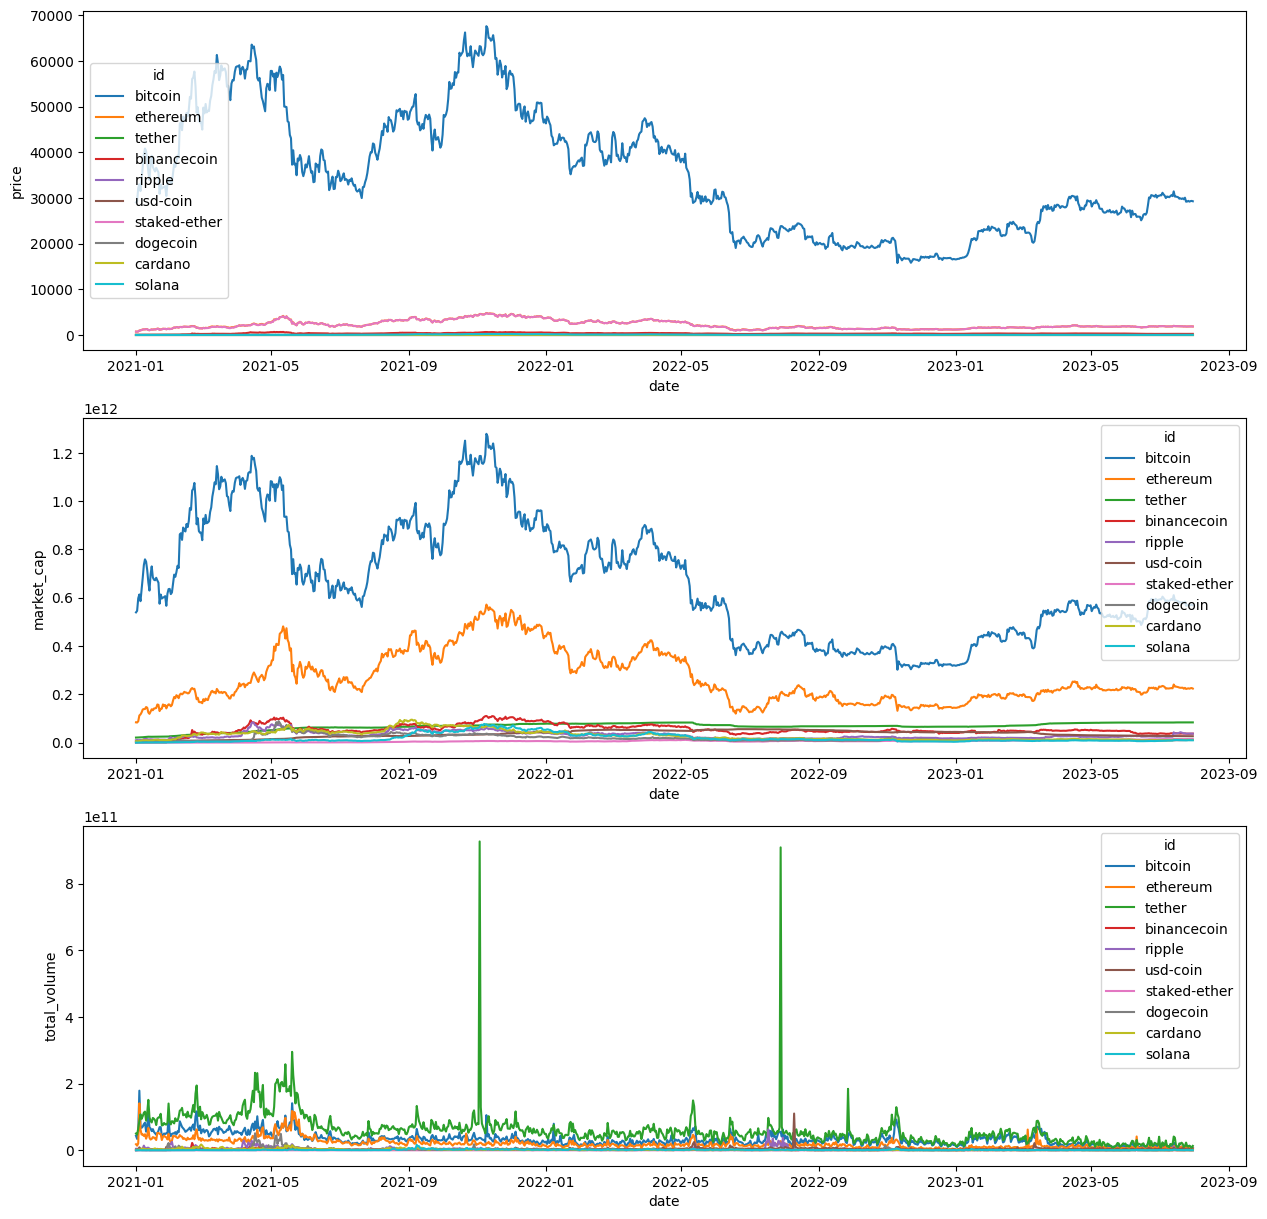

In [33]:
f, axs = plt.subplots(3, 1, figsize=(15, 15))

sns.lineplot(ax=axs[0], data=df, x='date', y='price', hue='id')
sns.lineplot(ax=axs[1], data=df, x='date', y='market_cap', hue='id')
sns.lineplot(ax=axs[2], data=df, x='date', y='total_volume', hue='id')

Uno de los primeros detalles a observar es la gran diferencia de precios entre distintas monedas.

In [34]:
df_aux = df.groupby(by=['id'])[['price', 'market_cap', 'total_volume']].agg({'price':['mean', 'min', 'max'],
                                                                            'market_cap':['mean', 'min', 'max'],
                                                                            'total_volume':['mean', 'min', 'max']})
df_aux

price                                market_cap   
                      mean           min           max          mean   
id                                                                     
binancecoin     337.974744     37.394591    675.098974  5.433283e+10  \
bitcoin       35218.079667  15742.444336  67617.015545  6.673150e+11   
cardano           0.909147      0.175679      2.967075  2.960471e+10   
dogecoin          0.134661      0.004707      0.681842  1.784651e+10   
ethereum       2241.812116    730.147340   4815.004634  2.660345e+11   
ripple            0.640631      0.220535      1.837677  3.073705e+10   
solana           58.240824      1.515807    259.239558  1.844291e+10   
staked-ether   2223.775559    723.531433   4775.452755  5.999411e+09   
tether            1.000946      0.991878      1.011356  6.737560e+10   
usd-coin          1.000655      0.965578      1.010989  3.574697e+10   

                                          total_volume                 
                       min           max          mean           min   
id                                                                     
binancecoin   5.507756e+09  1.104412e+11  1.807493e+09  1.776448e+07  \
bitcoin       3.019638e+11  1.278798e+12  3.353015e+10  3.882362e+09   
cardano       5.459442e+09  9.500373e+10  1.907566e+09  8.908647e+07   
dogecoin      5.978876e+08  8.879477e+10  2.102011e+09  1.276148e+08   
ethereum      8.329408e+10  5.716658e+11  2.012762e+10  2.179799e+09   
ripple        9.986921e+09  8.438906e+10  3.749810e+09  2.316223e+08   
solana        6.976680e+07  7.742731e+10  1.265559e+09  1.711138e+07   
staked-ether  1.212344e+07  1.539444e+10  2.303485e+07  6.217976e+01   
tether        2.093403e+10  8.389507e+10  6.154257e+10  6.894278e+09   
usd-coin      3.925840e+09  5.615979e+10  3.750401e+09  8.887580e+08   

                            
                       max  
id                          
binancecoin   2.210352e+10  
bitcoin       1.788941e+11  
cardano       1.743601e+10  
dogecoin      5.096065e+10  
ethereum      1.409065e+11  
ripple        6.246813e+10  
solana        1.614909e+10  
staked-ether  8.349852e+08  
tether        9.267677e+11  
usd-coin      1.102918e+11

Outliers

<Axes: xlabel='date', ylabel='total_volume'>

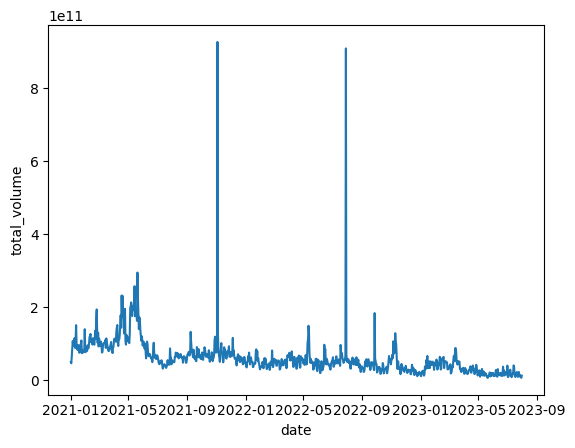

In [70]:
df_aux = df[df['id'] == 'ripple']
df_aux = df[df['id'] == 'tether']

sns.lineplot(data=df_aux, x='date', y='total_volume')

In [35]:
df['price'].describe()

count     9420.000000
mean      4008.356895
std      11259.882225
min          0.004707
25%          0.997199
50%          2.847470
75%       1569.160599
max      67617.015545
Name: price, dtype: float64

In [36]:
# sns.lineplot(data=df[~df['id'].isin(['bitcoin', 'staked-ether', 'ethereum', 'binancecoin', 'solana'])], x='date', y='price', hue='id')
# sns.lineplot(data=df[df['id'].isin(['tether'])], x='date', y='price', hue='id')

### 'alexa_rank', 'bing_matches' y 'facebook_likes'
Estas tres columnas solo tienen NaNs as que son irrelevantes. Podemos dropearlas.

In [37]:
df['alexa_rank'].unique()

array([nan])

In [38]:
df['bing_matches'].unique()

array([nan])

In [39]:
df['facebook_likes'].unique()

array([nan])

In [40]:
df = df.drop(columns=['alexa_rank', 'bing_matches', 'facebook_likes'])

In [41]:
df.columns

Index(['id', 'date', 'price', 'market_cap', 'total_volume',
       'twitter_followers', 'reddit_average_posts_48h',
       'reddit_average_comments_48h', 'reddit_subscribers',
       'reddit_accounts_active_48h', 'forks', 'stars', 'subscribers',
       'total_issues', 'closed_issues', 'pull_requests_merged',
       'pull_request_contributors', 'commit_count_4_weeks', 'code_additions',
       'code_deletions'],
      dtype='object')

### 'twitter_followers', 'reddit_average_posts_48h' y 'reddit_average_comments_48h'
Estas tres columnas solo tienen NaNs as que son irrelevantes. Podemos dropearlas.

In [42]:
print('Cantidad NaNs en twitter_followers:', df['twitter_followers'].isna().sum())
print('Cantidad NaNs en twitter_followers:', df['twitter_followers'].isna().sum())
print('Cantidad NaNs en twitter_followers:', df['twitter_followers'].isna().sum())
print('Cantidad NaNs en twitter_followers:', df['twitter_followers'].isna().sum())
print('Cantidad NaNs en twitter_followers:', df['twitter_followers'].isna().sum())
print('Cantidad NaNs en twitter_followers:', df['twitter_followers'].isna().sum())
print('Cantidad NaNs en twitter_followers:', df['twitter_followers'].isna().sum())
print('Cantidad NaNs en twitter_followers:', df['twitter_followers'].isna().sum())
print('Cantidad NaNs en twitter_followers:', df['twitter_followers'].isna().sum())

Cantidad NaNs en twitter_followers: 1592
Cantidad NaNs en twitter_followers: 1592
Cantidad NaNs en twitter_followers: 1592
Cantidad NaNs en twitter_followers: 1592
Cantidad NaNs en twitter_followers: 1592
Cantidad NaNs en twitter_followers: 1592
Cantidad NaNs en twitter_followers: 1592
Cantidad NaNs en twitter_followers: 1592
Cantidad NaNs en twitter_followers: 1592


In [43]:
df.isna().sum()

id                                0
date                              0
price                             0
market_cap                        0
total_volume                      0
twitter_followers              1592
reddit_average_posts_48h          0
reddit_average_comments_48h       0
reddit_subscribers             2812
reddit_accounts_active_48h     2812
forks                          4115
stars                          4115
subscribers                    4115
total_issues                   4115
closed_issues                  4115
pull_requests_merged           4115
pull_request_contributors      4115
commit_count_4_weeks           4115
code_additions                 4115
code_deletions                 4115
dtype: int64

In [44]:
df['twitter_followers'].unique()
df['reddit_average_posts_48h'].unique()
df['reddit_average_comments_48h'].unique()

array([ 975.917, 1083.818, 1610.667, ...,   10.2  ,  187.5  ,  140.   ])

In [45]:
df['twitter_followers'].isna().sum()
# df['reddit_subscribers'].isna().sum()

1592

In [46]:
df['reddit_average_posts_48h'].isna().sum()
df['reddit_average_comments_48h'].isna().sum()


0

In [47]:
df_aux = df.groupby(by=['id'])[['price', 'market_cap', 'total_volume']].agg({'price':['mean', 'min', 'max'],
                                                                            'market_cap':['mean', 'min', 'max'],
                                                                            'total_volume':['mean', 'min', 'max']})
df_aux

price                                market_cap   
                      mean           min           max          mean   
id                                                                     
binancecoin     337.974744     37.394591    675.098974  5.433283e+10  \
bitcoin       35218.079667  15742.444336  67617.015545  6.673150e+11   
cardano           0.909147      0.175679      2.967075  2.960471e+10   
dogecoin          0.134661      0.004707      0.681842  1.784651e+10   
ethereum       2241.812116    730.147340   4815.004634  2.660345e+11   
ripple            0.640631      0.220535      1.837677  3.073705e+10   
solana           58.240824      1.515807    259.239558  1.844291e+10   
staked-ether   2223.775559    723.531433   4775.452755  5.999411e+09   
tether            1.000946      0.991878      1.011356  6.737560e+10   
usd-coin          1.000655      0.965578      1.010989  3.574697e+10   

                                          total_volume                 
                       min           max          mean           min   
id                                                                     
binancecoin   5.507756e+09  1.104412e+11  1.807493e+09  1.776448e+07  \
bitcoin       3.019638e+11  1.278798e+12  3.353015e+10  3.882362e+09   
cardano       5.459442e+09  9.500373e+10  1.907566e+09  8.908647e+07   
dogecoin      5.978876e+08  8.879477e+10  2.102011e+09  1.276148e+08   
ethereum      8.329408e+10  5.716658e+11  2.012762e+10  2.179799e+09   
ripple        9.986921e+09  8.438906e+10  3.749810e+09  2.316223e+08   
solana        6.976680e+07  7.742731e+10  1.265559e+09  1.711138e+07   
staked-ether  1.212344e+07  1.539444e+10  2.303485e+07  6.217976e+01   
tether        2.093403e+10  8.389507e+10  6.154257e+10  6.894278e+09   
usd-coin      3.925840e+09  5.615979e+10  3.750401e+09  8.887580e+08   

                            
                       max  
id                          
binancecoin   2.210352e+10  
bitcoin       1.788941e+11  
cardano       1.743601e+10  
dogecoin      5.096065e+10  
ethereum      1.409065e+11  
ripple        6.246813e+10  
solana        1.614909e+10  
staked-ether  8.349852e+08  
tether        9.267677e+11  
usd-coin      1.102918e+11

In [48]:
df.tail(100)

,id,date,price,market_cap,total_volume,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,forks,stars,subscribers,total_issues,closed_issues,pull_requests_merged,pull_request_contributors,commit_count_4_weeks,code_additions,code_deletions
9320,solana,2023-07-20,26.353312,1.063342e+10,5.915756e+08,NaN,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9321,ethereum,2023-07-21,1891.014505,2.274843e+11,1.120417e+10,NaN,2.00,36.833,2420503.0,1858.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9322,tether,2023-07-21,1.000199,8.383934e+10,2.282957e+10,NaN,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9323,binancecoin,2023-07-21,242.624777,3.784336e+10,5.214800e+08,NaN,0.00,9.000,892857.0,500.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9324,ripple,2023-07-21,0.793284,4.172912e+10,2.588946e+09,NaN,0.00,0.000,357043.0,603.000000,1454.0,4341.0,510.0,1224.0,922.0,546.0,49.0,27.0,21811.0,-2707.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9415,usd-coin,2023-07-31,1.000102,2.653864e+10,2.832065e+09,NaN,0.00,0.000,NaN,NaN,263.0,431.0,29.0,41.0,36.0,253.0,16.0,0.0,0.0,0.0
9416,staked-ether,2023-07-31,1859.788253,1.473927e+10,6.764889e+07,154051.0,0.00,0.000,5146.0,32.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9417,dogecoin,2023-07-31,0.078035,1.096958e+10,5.214428e+08,3836842.0,2.00,56.333,2418534.0,1057.714286,2789.0,14313.0,847.0,1167.0,1021.0,1205.0,158.0,0.0,0.0,0.0
9418,cardano,2023-07-31,0.315337,1.102900e+10,1.709447e+08,839974.0,5.75,57.000,689361.0,318.600000,637.0,3758.0,462.0,849.0,665.0,1706.0,80.0,0.0,0.0,0.0


In [49]:
df[df['twitter_followers'].isna()]

,id,date,price,market_cap,total_volume,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,forks,stars,subscribers,total_issues,closed_issues,pull_requests_merged,pull_request_contributors,commit_count_4_weeks,code_additions,code_deletions
9,bitcoin,2021-01-10,40296.529004,7.493472e+11,5.592181e+10,NaN,6.273,1374.364,1911703.0,10570.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,bitcoin,2021-08-31,47124.254225,8.857293e+11,3.232607e+10,NaN,6.750,749.583,3308555.0,3743.846154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,bitcoin,2021-09-25,42752.168155,8.097725e+11,4.297307e+10,NaN,6.182,879.636,3382054.0,4192.583333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,bitcoin,2022-01-09,41756.662324,7.928926e+11,2.333702e+10,NaN,6.222,1654.778,3766618.0,3919.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,bitcoin,2022-02-05,41673.839554,7.773551e+11,2.534722e+10,NaN,6.000,765.800,3874983.0,3705.000000,31480.0,61675.0,3902.0,6714.0,6102.0,9385.0,770.0,254.0,3606.0,-2801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9408,dogecoin,2023-07-30,0.080199,1.126689e+10,5.712029e+08,NaN,10.000,140.000,2418389.0,1061.666667,2790.0,14313.0,847.0,1167.0,1021.0,1205.0,158.0,0.0,0.0,0.0
9409,cardano,2023-07-30,0.312612,1.095901e+10,1.428446e+08,NaN,2.250,20.750,689381.0,276.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9410,solana,2023-07-30,25.165048,1.017896e+10,2.660027e+08,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9415,usd-coin,2023-07-31,1.000102,2.653864e+10,2.832065e+09,NaN,0.000,0.000,NaN,NaN,263.0,431.0,29.0,41.0,36.0,253.0,16.0,0.0,0.0,0.0


In [57]:
df.columns

Index(['id', 'date', 'price', 'market_cap', 'total_volume',
       'twitter_followers', 'reddit_average_posts_48h',
       'reddit_average_comments_48h', 'reddit_subscribers',
       'reddit_accounts_active_48h', 'forks', 'stars', 'subscribers',
       'total_issues', 'closed_issues', 'pull_requests_merged',
       'pull_request_contributors', 'commit_count_4_weeks', 'code_additions',
       'code_deletions'],
      dtype='object')

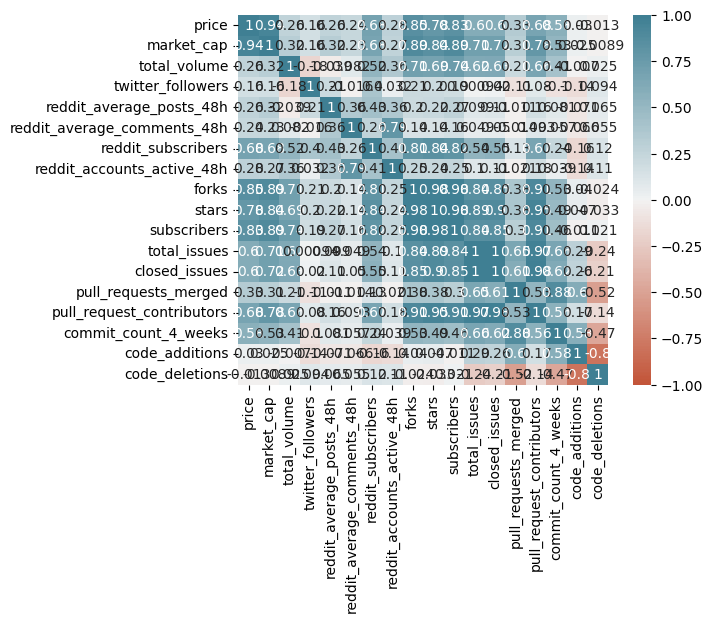

In [60]:
# corr_matrix = df[['price', 'market_cap', 'total_volume', 'reddit_average_posts_48h', 'reddit_average_comments_48h', 'code_additions']].corr()
corr_matrix = df.drop(columns=['id', 'date']).corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

---
**Exportar data Limpia**

In [62]:
df.to_csv("datasets/cleaned_coins_data.csv")

---
**BORRAR LUEGO**

- conocer los datos
- datos duplicados
- datos NaN
- outliers y extremos
- Graficas coherentes con el tipo de dato que queremos mostrar.

In [ ]:
f = plt.Figure()
ax = plt.axes()

# for c in coinIds:
#     x = df[df['id'] == c]['date']
#     y = df[df['id'] == c]['price']
#     # ax.plot(X, y)
#     sns.lineplot(df, x='date', y='price', hue='id')

In [ ]:
corr_matrix = housing.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)